# **Pandas ``Case Study``**

In [19]:
import numpy as np
import pandas as pd

In [3]:
# till now
# Timestamp
# DatetimeIndex
# date_range()
# to_datetime()

# Timedelta Object
Represents a duration , the difference between two dates or times.

In [9]:
# create using Timestamp objects
t1 = pd.Timestamp("23rd jan 2023 16:43:14")
t2 = pd.Timestamp("26th jan 2023 10:00:00")

t2-t1

Timedelta('2 days 17:16:46')

In [13]:
# standalone creation
pd.Timedelta(days=2,hours=16,minutes = 43,seconds=14)

Timedelta('2 days 16:43:14')

In [15]:
# Arithmetic
pd.Timestamp('23rd jan 2023 13:00:00')+pd.Timedelta(days=2,hours=16,minutes=43)

Timestamp('2023-01-26 05:43:00')

In [18]:
#timedelta can apply on every elements
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D') + pd.Timedelta(days=2,hours=16,minutes=43)

DatetimeIndex(['2023-01-08 16:43:00', '2023-01-09 16:43:00',
               '2023-01-10 16:43:00', '2023-01-11 16:43:00',
               '2023-01-12 16:43:00', '2023-01-13 16:43:00',
               '2023-01-14 16:43:00', '2023-01-15 16:43:00',
               '2023-01-16 16:43:00', '2023-01-17 16:43:00',
               '2023-01-18 16:43:00', '2023-01-19 16:43:00',
               '2023-01-20 16:43:00', '2023-01-21 16:43:00',
               '2023-01-22 16:43:00', '2023-01-23 16:43:00',
               '2023-01-24 16:43:00', '2023-01-25 16:43:00',
               '2023-01-26 16:43:00', '2023-01-27 16:43:00',
               '2023-01-28 16:43:00', '2023-01-29 16:43:00',
               '2023-01-30 16:43:00', '2023-01-31 16:43:00',
               '2023-02-01 16:43:00', '2023-02-02 16:43:00'],
              dtype='datetime64[ns]', freq='D')

In [21]:
# real life eg:


log = pd.read_csv("login.csv")
df = pd.read_csv("deliveries.csv")
g = pd.read_csv("google.csv")
df.head(2)

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98


In [22]:
df.info() # object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [23]:
df['order_date']=pd.to_datetime(df['order_date'])
df['delivery_date']=pd.to_datetime(df['delivery_date'])

In [28]:
#delivery period

df['delivery_time']=df['delivery_date'] - df['order_date']
df.delivery_time.mean()

Timedelta('1217 days 22:53:53.532934128')

### Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

In [29]:
# stock data
google = pd.read_csv('google.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [31]:
google.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
4469,2022-05-19,2236.820068,2271.75,2209.360107,2214.909912,2214.909912,1459600
4470,2022-05-20,2241.709961,2251.00,2127.459961,2186.260010,2186.260010,1878100


In [38]:
#google.info()

In [34]:
google.Date=pd.to_datetime(google.Date)

In [37]:
#google.info()

In [39]:
# suggestion to make your ``Date`` wala colunm as index
google.set_index("Date",inplace=True)

In [44]:
# fetch a specific date
# but only business data you will get
# becoz stock market not works on weekends i.e., sat and sun
google.loc['2004-08-20']

Open         5.031640e+01
High         5.433633e+01
Low          5.006235e+01
Close        5.395277e+01
Adj Close    5.395277e+01
Volume       2.294287e+07
Name: 2004-08-20 00:00:00, dtype: float64

In [47]:
# partial indexing - > select a particular year/month
google['2004-8'] # 'year-month'
#or 
# google['2022']

# important note :
# ---------------
# here is the  power of setting ``Date`` as index
# bcoz now you don't have to filter the ``Date`` 
# by manually putting the ``Date``

<ipython-input-47-5d3689db8b8b>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  google['2004-8'] # 'year-month'


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241307
2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221498
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252


In [75]:
# create year month-name and day-name
google['month_name']=google.index.month_name()
google['weekday_name']=google.index.day_name()
google['quarter']=google.index.quarter

In [76]:
google

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3
...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100,May,Monday,2
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800,May,Tuesday,2
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100,May,Wednesday,2


In [93]:
# slicing 
# and remember in ``iloc`` last element not included
# but in ``loc`` first and last all included
google.loc['2004-08-19':'2004-09-30':4]

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252,August,Tuesday,3
2004-09-07,50.316402,50.809551,49.619015,50.600338,50.600338,5875340,September,Tuesday,3
2004-09-13,53.115910,54.002586,53.031227,53.549286,53.549286,7881431,September,Monday,3
2004-09-17,56.996365,58.525631,56.562988,58.525631,58.525631,9517541,September,Friday,3
2004-09-23,59.198112,61.086037,58.291508,60.184414,60.184414,8576226,September,Thursday,3
2004-09-29,63.113434,67.257904,62.879314,65.295258,65.295258,30661498,September,Wednesday,3


In [113]:
# challenge -> fetch info for a particular date every year -> limitation of timedelta
# means 6th of january for every year

new_google = google[google.index.isin(pd.date_range(start='2005-1-6',end='2020-1-6',freq=pd.DateOffset(years=1))
)]

# here use pd.DateOffset(year = 1)
# it will automatically exclude leap year
# and get you exact 6th of jan.. for every year

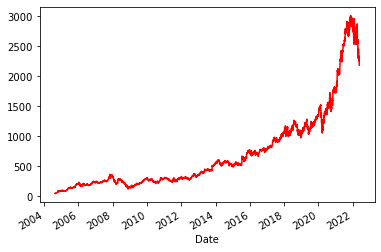

In [124]:
# viz a single col
google['Close'].plot(c='red');

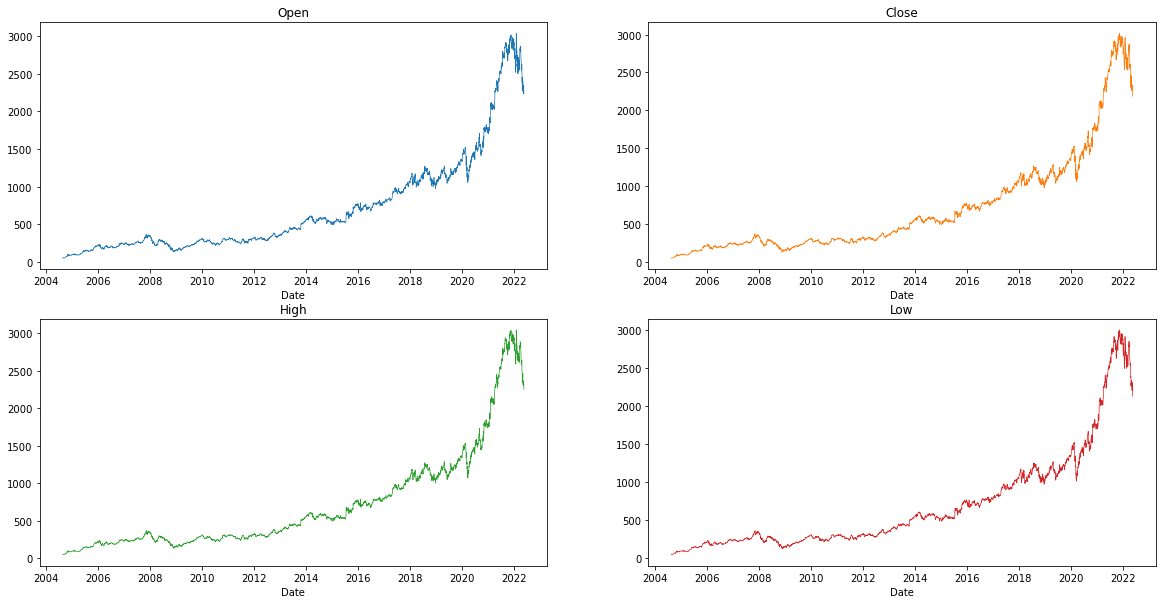

In [190]:
# viz all cols together
#import matplotlib.pyplot as plt

#fig, axs = plt.subplots(2, 2,figsize=(15,10),sharex=True)
#axs[0,0].plot(google['Open'],color='red')
#axs[1,0].plot(google['Close'],color='red')
#axs[0,1].plot(google['High'],color='green')
#axs[1,1].plot(google['Low'],color='yellow')


# QUICK WAY :
# ----------
# viz all cols together
subset_google = google[['Open', 'Close', 'High', 'Low']]
ax = subset_google.plot(subplots=True,
                    layout=(2, 2),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                     figsize=(20,10),
                      title=['Open', 'Close', 'High', 'Low'])

In [191]:
# plot for a particular year/month/week

<AxesSubplot:xlabel='Date'>

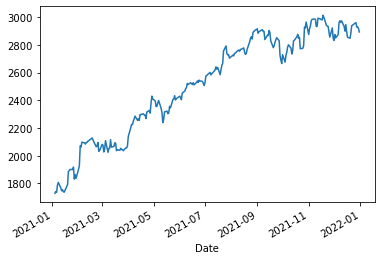

In [197]:
#yearly trend
google.loc['2021']['Close'].plot()

<AxesSubplot:xlabel='month_name'>

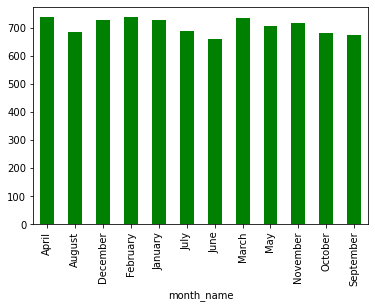

In [241]:
# monthly trend
# month-wise Opening's
google.groupby('month_name')['Open'].mean().plot(kind='bar',color='g')

<AxesSubplot:xlabel='quarter'>

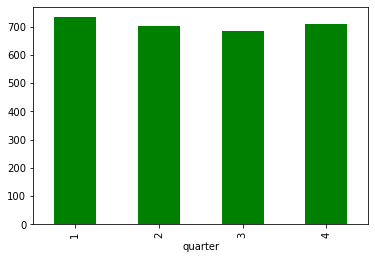

In [243]:
# Quaterly trend
# missing values becoz of that looking weired
#google['Close'].asfreq("Q").plot()

#
google.groupby('quarter')['Open'].mean().plot(kind='bar',color='g')

In [216]:
#frequency

In [212]:
#asfreq
google.asfreq("Q") # Quaterly Data

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-09-30,64.707458,65.902977,64.259140,64.558022,64.558022,13823420.0,September,Thursday,3.0
2004-12-31,99.243011,99.566795,95.920464,96.035034,96.035034,15394487.0,December,Friday,4.0
2005-03-31,88.642746,90.356323,88.488327,89.917969,89.917969,13587941.0,March,Thursday,1.0
2005-06-30,146.620438,148.906860,144.976593,146.525787,146.525787,30301955.0,June,Thursday,2.0
2005-09-30,156.523315,158.157181,155.561920,157.639130,157.639130,18371203.0,September,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2021-03-31,2059.120117,2093.326904,2056.745117,2068.629883,2068.629883,1459900.0,March,Wednesday,1.0
2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300.0,June,Wednesday,2.0
2021-09-30,2686.500000,2711.800049,2660.000000,2665.310059,2665.310059,1764700.0,September,Thursday,3.0


In [213]:
#asfreq - 2
google.asfreq("Y") # Year Last Data

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-12-31,99.243011,99.566795,95.920464,96.035034,96.035034,15394487.0,December,Friday,4.0
2005-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,347.980682,349.933350,344.000610,344.448914,344.448914,4770213.0,December,Monday,4.0
2008-12-31,151.532028,154.919327,150.739990,153.250580,153.250580,5795241.0,December,Wednesday,4.0
2009-12-31,311.208527,311.532288,308.832428,308.832428,308.832428,2448744.0,December,Thursday,4.0
2010-12-31,297.255798,298.092682,294.909607,295.875977,295.875977,3090139.0,December,Friday,4.0
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-31,348.693024,353.958282,346.700470,352.369232,352.369232,4009773.0,December,Monday,4.0


In [214]:
#asfreq - 3
google.asfreq("H") # Hourly Data

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-05-19 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-19 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-19 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
#asfreq - 3
# can also fill nan values

google.asfreq("6H",method='ffill') # forward fill or use backward fill i.e., bfill

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-19 06:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-19 12:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-19 18:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600,May,Thursday,2
2022-05-19 06:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600,May,Thursday,2
2022-05-19 12:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600,May,Thursday,2


# Important

### Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

**Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.<br>
**Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

<AxesSubplot:xlabel='Date'>

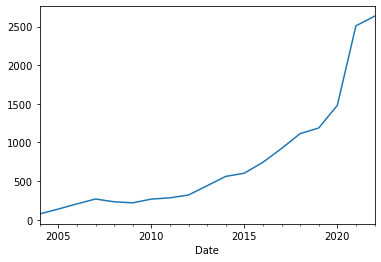

In [249]:
# generally do 
# Downsampling
# when your data is ``noisy``
google['Open'].resample("Y").mean().plot()

In [251]:
# Upsampling
google['Close'].resample("H").interpolate(method='linear')

Date
2004-08-19 00:00:00      49.982655
2004-08-19 01:00:00      50.148076
2004-08-19 02:00:00      50.313498
2004-08-19 03:00:00      50.478919
2004-08-19 04:00:00      50.644341
                          ...     
2022-05-19 20:00:00    2191.034994
2022-05-19 21:00:00    2189.841248
2022-05-19 22:00:00    2188.647502
2022-05-19 23:00:00    2187.453756
2022-05-20 00:00:00    2186.260010
Freq: H, Name: Close, Length: 155593, dtype: float64

**so whenever you do ``Upsampling`` the no. of rows**
- increases and when no.ofrows increases missing values
- also increases and to fill missing values have to use 
- ``interpolate`` to fill

<AxesSubplot:xlabel='Date'>

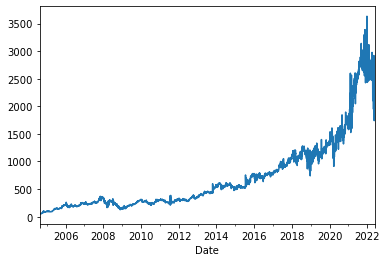

In [254]:
# through polynomial can also do
google['Close'].resample("H").interpolate(method='spline',order = 2).plot()

# But 90``%`` of the time you will do Downsampling

### Rolling Window(Smoothing)
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data. 

<AxesSubplot:title={'center':'ewm'}, xlabel='Date'>

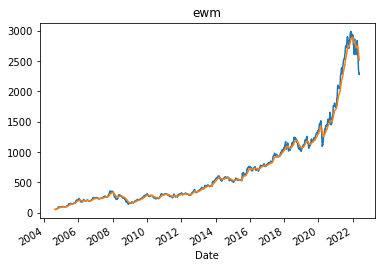

In [267]:
#timestamp---> 02:03:00

#google['Open'].plot() #---original

google['Open'].rolling(7).mean().plot() #rolled for week
#it will smooth the data
# it's orange one


google['Open'].ewm(30).mean().plot(title='ewm')
# it will give more weightage to recent or last one and less
# to others

### Shifting

The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

In [295]:
# shift
google['Open'].shift(-1) # ulta direction

Date
2004-08-19      50.316402
2004-08-20      55.168217
2004-08-23      55.412300
2004-08-24      52.284027
2004-08-25      52.279045
                 ...     
2022-05-16    2344.550049
2022-05-17    2304.750000
2022-05-18    2236.820068
2022-05-19    2241.709961
2022-05-20            NaN
Name: Open, Length: 4471, dtype: float64

In [296]:
# compare above with this
google['Open']

Date
2004-08-19      49.813290
2004-08-20      50.316402
2004-08-23      55.168217
2004-08-24      55.412300
2004-08-25      52.284027
                 ...     
2022-05-16    2307.679932
2022-05-17    2344.550049
2022-05-18    2304.750000
2022-05-19    2236.820068
2022-05-20    2241.709961
Name: Open, Length: 4471, dtype: float64

In [297]:
# shift example
log = pd.read_csv('login.csv',header=None)

In [298]:
df = log[[1,2]]
df.head() #(user_id,when login)
df.rename(columns = {1:'user_id',2:'login_time'},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [299]:
df.head(3)

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18


**To find ``avg`` return time on ``web-server`` just do these things**

In [300]:
df['user_id'].value_counts()

413    222
458    208
492    162
882    140
592    122
      ... 
665      1
669      1
671      1
742      1
698      1
Name: user_id, Length: 433, dtype: int64

In [301]:
user_df = df[df['user_id']==413]
user_df.head()

,user_id,login_time
11,413,2017-01-09 12:29:25
12,413,2017-01-09 12:40:39
14,413,2017-01-09 14:08:04
33,413,2017-01-10 14:36:23
35,413,2017-01-10 15:22:45


In [302]:
user_df['login_time']=pd.to_datetime(user_df.login_time)

<ipython-input-302-0511bb90c117>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time']=pd.to_datetime(user_df.login_time)


In [303]:
# want to find after logout
# again kab ata hai
# basically, average return time
user_df['shifted']=user_df['login_time'].shift(1)
user_df

<ipython-input-303-100fd3e284e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted']=user_df['login_time'].shift(1)


,user_id,login_time,shifted
11,413,2017-01-09 12:29:25,NaT
12,413,2017-01-09 12:40:39,2017-01-09 12:29:25
14,413,2017-01-09 14:08:04,2017-01-09 12:40:39
33,413,2017-01-10 14:36:23,2017-01-09 14:08:04
35,413,2017-01-10 15:22:45,2017-01-10 14:36:23
...,...,...,...
2958,413,2017-12-29 18:20:32,2017-12-29 18:19:48
2963,413,2017-12-30 13:41:21,2017-12-29 18:20:32
2974,413,2018-01-01 15:16:25,2017-12-30 13:41:21
2982,413,2018-01-02 18:15:45,2018-01-01 15:16:25


# **``Average return time``**

In [304]:
(user_df['login_time'] - user_df['shifted']).mean()

Timedelta('1 days 15:05:13.384615384')

In [305]:
user_df

,user_id,login_time,shifted
11,413,2017-01-09 12:29:25,NaT
12,413,2017-01-09 12:40:39,2017-01-09 12:29:25
14,413,2017-01-09 14:08:04,2017-01-09 12:40:39
33,413,2017-01-10 14:36:23,2017-01-09 14:08:04
35,413,2017-01-10 15:22:45,2017-01-10 14:36:23
...,...,...,...
2958,413,2017-12-29 18:20:32,2017-12-29 18:19:48
2963,413,2017-12-30 13:41:21,2017-12-29 18:20:32
2974,413,2018-01-01 15:16:25,2017-12-30 13:41:21
2982,413,2018-01-02 18:15:45,2018-01-01 15:16:25
